# Matrix Structural Analysis Use Tutorial

## This tutorial outlines the use of the matrix structural analysis algorithm for the first problem during the code review on 2/24/25.

### Begin by importing necessary libraries and functionality from matrix structural analysis file

In [1]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath('..'))
from src.mat_struct import *
from src.nonlinear_analysis import *

### Define node coordinates as row vectors (x, y, z)

In [2]:
node0 = [0, 0, 10]  # Fixed
node1 = [15, 0, 10]  # Midpoint (force applied)
node2 = [15, 0, 0]  # Pin
nodes = np.array([node0, node1, node2])

### Define elements to establish connectivity in the structure ([node1, node2, E, v, A, Iz, Iy, Ip, J, z_axis])

In [3]:
el_1 = [0, 1, 1000, 0.3, 0.5, 0.041667, 0.010416, 0.16667, 0.02861, [0, 0, 1]]
el_2 = [1, 2, 1000, 0.3, 0.5, 0.041667, 0.010416, 0.16667, 0.02861, [1, 0, 0]]
element_connect = np.array([el_1, el_2], dtype=object)

### Define applied forces as node vectors corresponding to the node location (Fx, Fy, Fz, Mx, My, Mz)

In [4]:
f_appl = np.array([[0,0,0,0,0,0],   # Node 0: No force
                   [0.1,0.05,-0.07,0.05,-0.1,0.25],   # Node 1: Applied force in x and y direction
                   [0,0,0,0,0,0]])  # Node 2: No force

### Define support conditions, where a value of 1 is restricted and a value of 0 is unrestricted for the corresponding DOF (Node index, DOF 1, DOF 2, DOF 3, DOF 4, DOF 5, DOF 6)

In [5]:
support_0 = [0, 1, 1, 1, 1, 1, 1]  # Fixed: Restraints all DOF
support_1 = [1, 0, 0, 0, 0, 0, 0]  # Free: No restraints
support_2 = [2, 1, 1, 1, 0, 0, 0]  # Pinned: Restraints all translation (x, y, z)
supports = np.array([support_0, support_1, support_2])

### Run Matrix Structural Analysis Algorithm to output displacement vector and force vector, respectively

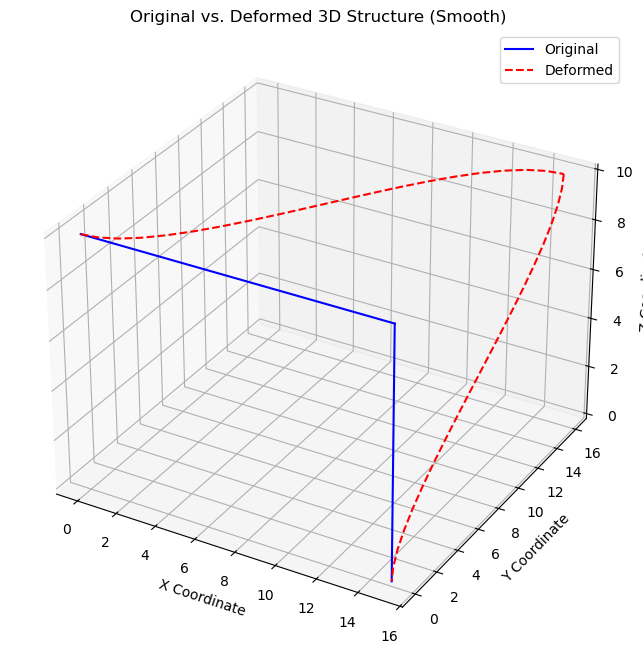

In [6]:
del_vec, F_vec, nodevals, elementvals = nonlinear_analysis(nodes, element_connect, f_appl, supports)

### Print Results

In [7]:
print("Displacements:\n", del_vec)
print("Forces:\n", F_vec)

Displacements:
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.84049957e-03  1.59842256e+00
 -1.30609177e-03 -1.47203405e-01 -1.67304182e-02  1.82342076e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.66161682e-01
  8.79128406e-03  1.82342076e-01]
Forces:
 [-9.46833190e-02 -3.42013092e-02  4.69541164e-03  1.07986908e-01
 -2.35979849e-02 -7.63019638e-01  1.00000000e-01  5.00000000e-02
 -7.00000000e-02  5.00000000e-02 -1.00000000e-01  2.50000000e-01
 -5.31668102e-03 -1.57986908e-02  6.53045884e-02  2.22044605e-16
  0.00000000e+00  2.77555756e-17]
